## Final Project Submission

Please fill out:
* Student name: Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# High Movie's Revinues on Boxoffice

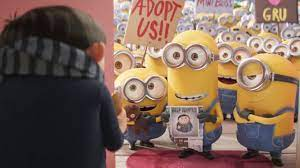

# Overview
 

This project analyzes data needs by Microsoft Company inorder to help them to create a movie studio and produce a movie that hits the box office.

Descriptive analysis of some movies had achieved high Box office earnings.
The  outcome data shows three recommandations,Microsoft Company can use this analysis to decide how to produce a successful movie.


# Business Problem

Microsoft has decided to create a movie studio.
Microsoft needs to know what factors might impact movie's revenues on the box office.

I am tring to investigate films were doing the best on the box office.And find out what factors might impact the movie revinues 
TO help Microsoft decide how to produce a movie hits box office.

# The Data Source and Data Exploration

In this project, I work with a Dataset, which can be found on the folder zippedData and included data from:

Box Office Mojo (https://www.boxofficemojo.com/)

IMDB (https://www.imdb.com/)

Rotten Tomatoes (https://www.rottentomatoes.com/)

TheMovieDB (https://www.themoviedb.org/)

The Numbers (https://www.the-numbers.com/)

The dataset which I used inxluded variables about :

1-Movie's Genre and avarage rating per each genre.

2-The production budget and how it can affects the movie's gross.

3- The month which the movie released on and how it impacts the Box office revinues.

I have modified the structure and contents of the dataset somewhat for the purposes of this project.
The different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.



# Methods

We will be able to:

1.Practice connecting to database by using Sqlite3

2.Practice using GROUP BY statements in SQL to apply aggregate functions like COUNT, MAX, MIN, and SUM

3.Practice using the HAVING clause to compare different aggregates

4.Opening and inspecting the contents of CSVs using pandas dataframes

5.Practice identifying and handling missing values

6.Practice joining multiple dataframes

7.Make visualizations using Matplotlib library



# Requirements

1. Load the Data with sqlite3
2. Load the Data from csv and tvs files and read it as pandas data frame
3.Create  dataframes represent the data.
4.Use pandas methods to inspect the shape and other attributes of these dataframes.
4.Perform Data Cleaning (Identify and handle missing values)
5.Perform Data Aggregation and Join the dataframes together
  .Identify and handle invalid values
6.Make visualizations using Matplotlip.

# The first question is: What is the distribution of movie rating by genres?

### Connecting to the Database

In the cells below, we:

Import the necessary libraries, pandas and sqlite3

Establish a connection to the database data.sqlite, called conn 


In [1]:
#Import the necessary libraries, pandas and sqlite3 using the standard alias

import sqlite3 as sql
import pandas as pd 


In [2]:
#connect to database
conn = sql.connect("zippedData/im.db/im.db")

Now, we connected to our database (zippedData)

### Viewing the List of Tables¶
Let's use the cursor to find out what tables are contained in this database.
create a cursor.

A cursor object is what can actually execute SQL commands. You create it by calling .cursor() on the connection.



In [3]:
#create a cursor.
cur = conn.cursor()

In [4]:
# (This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We displayed all the tables that are included in our data base

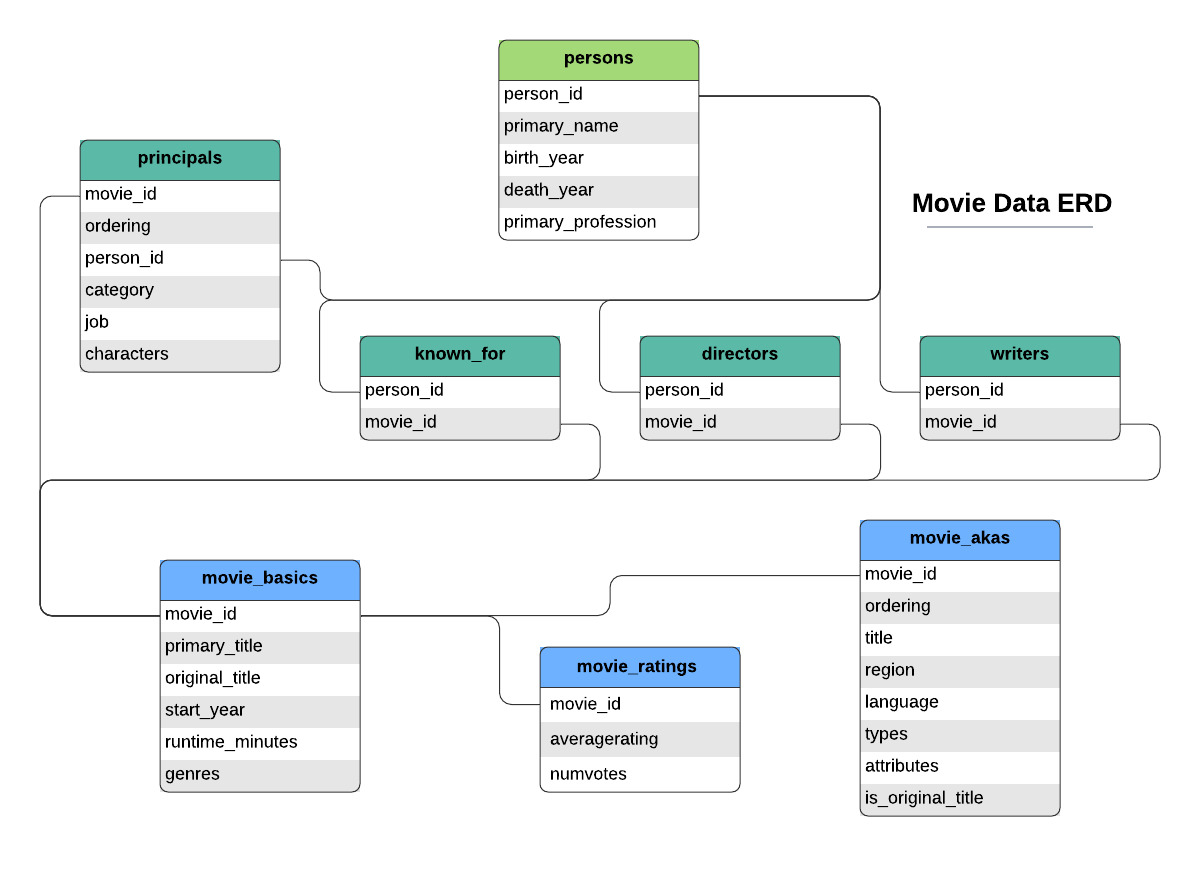

Acoording to the schema there is a relationship between movie_basics and movie rating ....let us view them.

### Load the Data

Use pd.read_sql to display the results of the query in a formatted table

In [5]:
#Selecting All Data from the movie_basics table and group the data by geners (the types of the movies)
# view the top 5 rows of the dataframe use .head() method.

pd.read_sql(""" SELECT  *          
FROM movie_basics 
GROUP BY genres
;""",conn  ).head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
1,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
2,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
3,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
4,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"


### Identifying and Handling Missing Values

We notice that the movie_basic dataframe has NaN values , let us remove these NaN values from our dataframe using WHERE clause

In [6]:
#Selecting All Data from the movie_basic
# clean the data from Null values

pd.read_sql(""" SELECT  *          
FROM movie_basics 
WHERE genres IS NOT NULL AND original_title IS NOT NULL
GROUP BY genres
;""",conn )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
1,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
2,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
3,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"
4,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography"
...,...,...,...,...,...,...
1080,tt5861250,The Wanderer,The Wanderer,2016,55.0,"Thriller,War,Western"
1081,tt1530983,Red Hill,Red Hill,2010,95.0,"Thriller,Western"
1082,tt10239930,Dog Company,Dog Company,2019,NaN,War
1083,tt5009172,"Dalibor, the Yugo Cowboy","Dalibor, the Yugo Cowboy",2014,138.0,"War,Western"


Now ,the movie_basic dataframe has no null values

### Viewing the movie_rating  data frame

Use pd.read_sql to display the results of the query in a formatted table

Write a query that gets the average rating.


In [7]:
# Selecting All Data from the movie_rating table and group the data by avarage rrating
pd.read_sql(""" SELECT  * 
FROM movie_ratings
GROUP BY averagerating ;""",conn)

,movie_id,averagerating,numvotes
0,tt7762194,1.0,67
1,tt7620554,1.1,598
2,tt7563496,1.2,86
3,tt8081062,1.3,3244
4,tt1736000,1.4,5
...,...,...,...
86,tt9680166,9.6,624
87,tt7541970,9.7,6
88,tt3450432,9.8,5
89,tt9743544,9.9,8


### Joining the movie_basics and movie_ratings  together

Write a query that uses JOIN statements to get the geners and avaragerating. Refer to the ERD above to understand which tables contain these pieces of information, and the relationship between these tables.

In [8]:
df = pd.read_sql(""" SELECT 
                b.original_title AS Title,
                b.start_year,
                b.genres AS genres ,
                r.averagerating AS rating ,
                r.numvotes
FROM movie_basics b 
JOIN movie_ratings r
USING ("movie_id")
GROUP BY genres
HAVING (averagerating > 5)
ORDER BY averagerating DESC
LIMIT 300;""",conn) 
df

,Title,start_year,genres,rating,numvotes
0,Love on a Leash,2010,"Documentary,Family,Romance",9.7,25
1,Foosballers,2019,"Comedy,Documentary,Sport",9.7,22
2,Lost Conquest,2015,"Comedy,Documentary,Fantasy",9.4,5
3,Sunakali,2017,"Documentary,Family,Musical",9.3,19
4,The Long Count Teaser,2016,"History,Sport",9.2,5
...,...,...,...,...,...
295,Dimensions of Failure,2010,"Comedy,Mystery,Sci-Fi",7.0,5
296,El hombre de las mil caras,2016,"Biography,Thriller",7.0,5544
297,Kim Dotcom: Caught in the Web,2017,"Biography,Documentary,Thriller",7.0,1105
298,If These Knishes Could Talk: The Story of the ...,2013,"Biography,Comedy,Documentary",7.0,66


joining these two related tables based on the shared culomns between them.
group the new data frame by genres (movies type) 
filter the result by using the clause (having) to set a condition that display the movies are having rate over 5
displayed the new data frame from the highest to lowest rate 
view only 300 rows by using limit.

### Data frame summery

Getting summery of the joiened data frame by using .info() method

In [9]:
# summery of our data frame using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       300 non-null    object 
 1   start_year  300 non-null    int64  
 2   genres      300 non-null    object 
 3   rating      300 non-null    float64
 4   numvotes    300 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


The data types : The columns containing strings are type object, The columns containing whole number are type int64 whereas, The columns containing decimal numbers are type float64.

# Perform Data Cleaning Required to Answer First Question

Recall that the first question is: What is the distribution of movie rating by genres?

To answer this question, we will need

### Identifying and Handling Missing Values

checking if the data frame has missing data by using .isna() method 

In [10]:
# checking if the data frame has missing data (na)
df.isna().sum()

Title         0
start_year    0
genres        0
rating        0
numvotes      0
dtype: int64

WE notice that the df data frame has no missing values

When we checked the df data frame summary befoe ,we notice that the ("start_year") column has intger data type .It should be datetime

Let us convert the data type by using  pd.to_datetime

In [11]:
#changing the data type of the(start_year) to datetime type

df['start_year'] = pd.to_datetime(df['start_year'])
df["start_year"]

0     1970-01-01 00:00:00.000002010
1     1970-01-01 00:00:00.000002019
2     1970-01-01 00:00:00.000002015
3     1970-01-01 00:00:00.000002017
4     1970-01-01 00:00:00.000002016
                   ...             
295   1970-01-01 00:00:00.000002010
296   1970-01-01 00:00:00.000002016
297   1970-01-01 00:00:00.000002017
298   1970-01-01 00:00:00.000002013
299   1970-01-01 00:00:00.000002012
Name: start_year, Length: 300, dtype: datetime64[ns]

We jut got the correct data type for (start_year) colunm

# Identifying and Handling Text Data Requiring Cleaning

It's useful to be able to clean up minor issues in text data.

Let us take a look at the values of  genres column of the df data frame  
extract a unique data from the dataset by using .unique() function

In [12]:
df["genres"].value_counts()


Action,Comedy,History       1
Action,Comedy,Horror        1
Action,Horror,Romance       1
Documentary,Mystery,News    1
Documentary,Drama,Sport     1
                           ..
Animation,Music             1
Action,Family,Thriller      1
Comedy,Drama,War            1
Fantasy,History,Music       1
Sci-Fi,Western              1
Name: genres, Length: 300, dtype: int64

In [13]:
df["genres"].unique()

array(['Documentary,Family,Romance', 'Comedy,Documentary,Sport',
       'Comedy,Documentary,Fantasy', 'Documentary,Family,Musical',
       'History,Sport', 'Documentary,History,War',
       'Crime,Documentary,Drama', 'Action,Documentary,Sport',
       'Comedy,Documentary,Romance', 'War', 'Music,Mystery', 'Game-Show',
       'Documentary,Family,War', 'History,War',
       'Comedy,Documentary,Family', 'Adventure,Biography,Crime',
       'Drama,Short', 'Drama,Fantasy,War', 'Documentary,News,Sport',
       'Documentary,News,Reality-TV', 'Documentary,Drama,Thriller',
       'Comedy,Drama,Reality-TV', 'Comedy,Documentary,Mystery',
       'Biography,Drama,War', 'Adventure,Comedy,Documentary',
       'Drama,Fantasy,Musical', 'Documentary,Western',
       'Documentary,History,Western', 'Crime,Documentary,History',
       'Biography,Documentary,Musical', 'Biography,Documentary,Drama',
       'Adventure,Biography,Documentary', 'Action,Adventure,Musical',
       'Documentary,Music,War', 'Adventure

We notice that .uniqe function returns the numpy array of unique values in genres colunm as a list.

We need to split these text data in the list above using .str.split() method ,Then explode each element in each list into a row by using explode() function. display the top 5 rows dataframe using .head() method

In [14]:
# spliting the data in the columns (genres) using .str.split() method
# use the explode() function to explode each element in each list into a row:
#display the top 5 rows dataframe using .head method¶

df["genres"] = df["genres"].str.split(",") 
genre_df = df.explode("genres") 
genre_df.head()

,Title,start_year,genres,rating,numvotes
0,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25
0,Love on a Leash,1970-01-01 00:00:00.000002010,Family,9.7,25
0,Love on a Leash,1970-01-01 00:00:00.000002010,Romance,9.7,25
1,Foosballers,1970-01-01 00:00:00.000002019,Comedy,9.7,22
1,Foosballers,1970-01-01 00:00:00.000002019,Documentary,9.7,22


After the update let us take a look at the counts of column (genres) in genre_df


In [15]:
# take a look at the counts of column (genres) in genre_df

genre_df["genres"].value_counts().sort_values()

Game-Show        1
Short            1
Reality-TV       4
News            16
Horror          16
Western         17
Sci-Fi          23
Sport           23
Musical         27
War             28
Crime           30
Fantasy         32
Thriller        32
Mystery         33
Romance         33
Family          34
Animation       35
Biography       37
Music           37
Action          41
Adventure       41
History         45
Comedy          56
Drama           75
Documentary    119
Name: genres, dtype: int64

We notice that the split function worked on each element  of data 

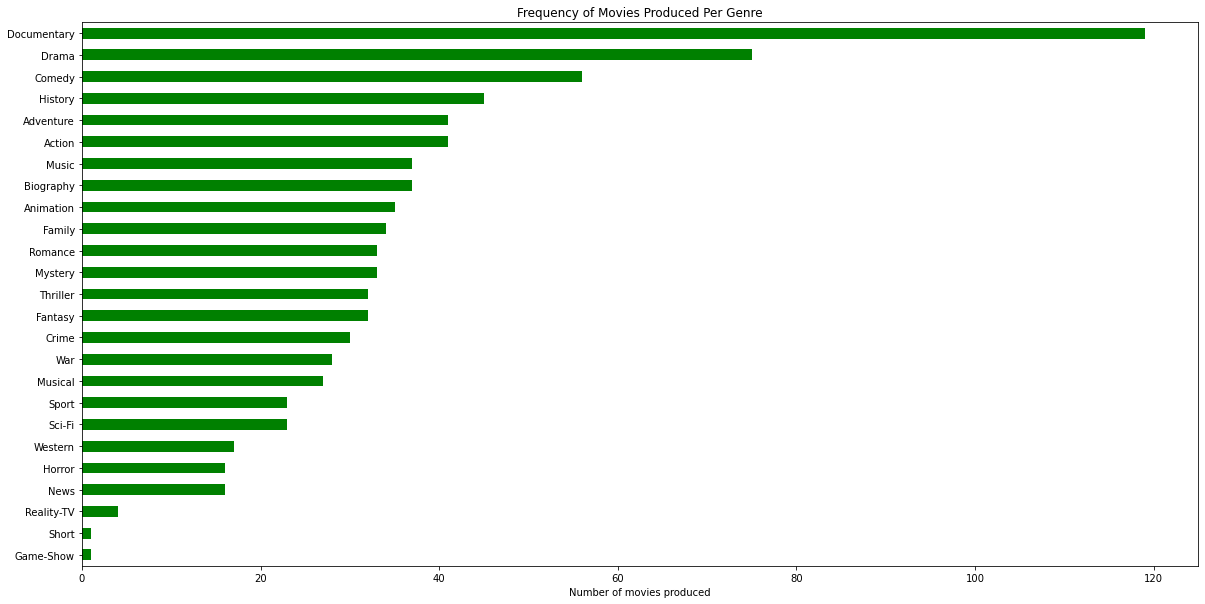

In [16]:
#We can then graph the frequency of each genre in our dataset
ax = genre_df["genres"].value_counts().sort_values().plot.barh(figsize = (20,10), title = "Frequency of Movies Produced Per Genre",color ="green");
ax.set_xlabel("Number of movies produced");

### Analizing Data

Inorder to answer our question we have to group the data frame by ("genres") column by using .groupby() method.
We have to add an Aggregation Function  (like mean) onto the groupby. This allows us to compute summary statistics!

In [17]:
# create a new data frame grouped by the (genres) colunm and calculate its mean
genre_df = genre_df.groupby("genres").mean()

genre_df

,rating,numvotes
genres,,
Action,7.726829,48462.439024
Adventure,7.892683,92559.121951
Animation,7.648571,7279.571429
Biography,7.832432,8273.513514
Comedy,7.891071,17991.946429
Crime,7.690000,12695.100000
Documentary,7.915126,1606.226891
Drama,7.656000,57318.653333
Family,7.794118,29884.852941


The above data frame which we called genra_df shows us the rating value of each type of movies

In [18]:
# calculate the mean values of the column ("rating") of the genra_df which grouped by genres
grouped = genre_df.groupby('genres')['rating'].mean()
grouped.sort_values()

genres
Horror         7.500000
Sci-Fi         7.539130
Animation      7.648571
Drama          7.656000
Western        7.664706
Crime          7.690000
Mystery        7.703030
Romance        7.715152
Thriller       7.715625
Action         7.726829
Music          7.748649
Fantasy        7.775000
Family         7.794118
News           7.800000
History        7.822222
Biography      7.832432
Musical        7.848148
Sport          7.865217
Comedy         7.891071
Adventure      7.892683
Documentary    7.915126
War            7.939286
Reality-TV     8.100000
Short          8.800000
Game-Show      9.000000
Name: rating, dtype: float64

"The game shows  got the highest raiting = 9"

In the cells below,
we Import the necessary libraries, matplotlib and numpy

A quick introduction to Matplotlib's style module. Matplotlib comes with a number of predefined styles to customize the plots. 

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Bar Graphs

One of  Matplotlib's style module is bar graph module showing comparisons across data.

Bar graphs allow comparisons across categories by presenting categorical data as rectangular bars 

Matplotlib uses plotting functions. Matplotlib's .bar() and .barh() functions can be used to draw constant width vertical and constant height horizontal bar graphs for a simple sequence of x, y values. (https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)


Text(0, 0.5, 'Genres catogory')

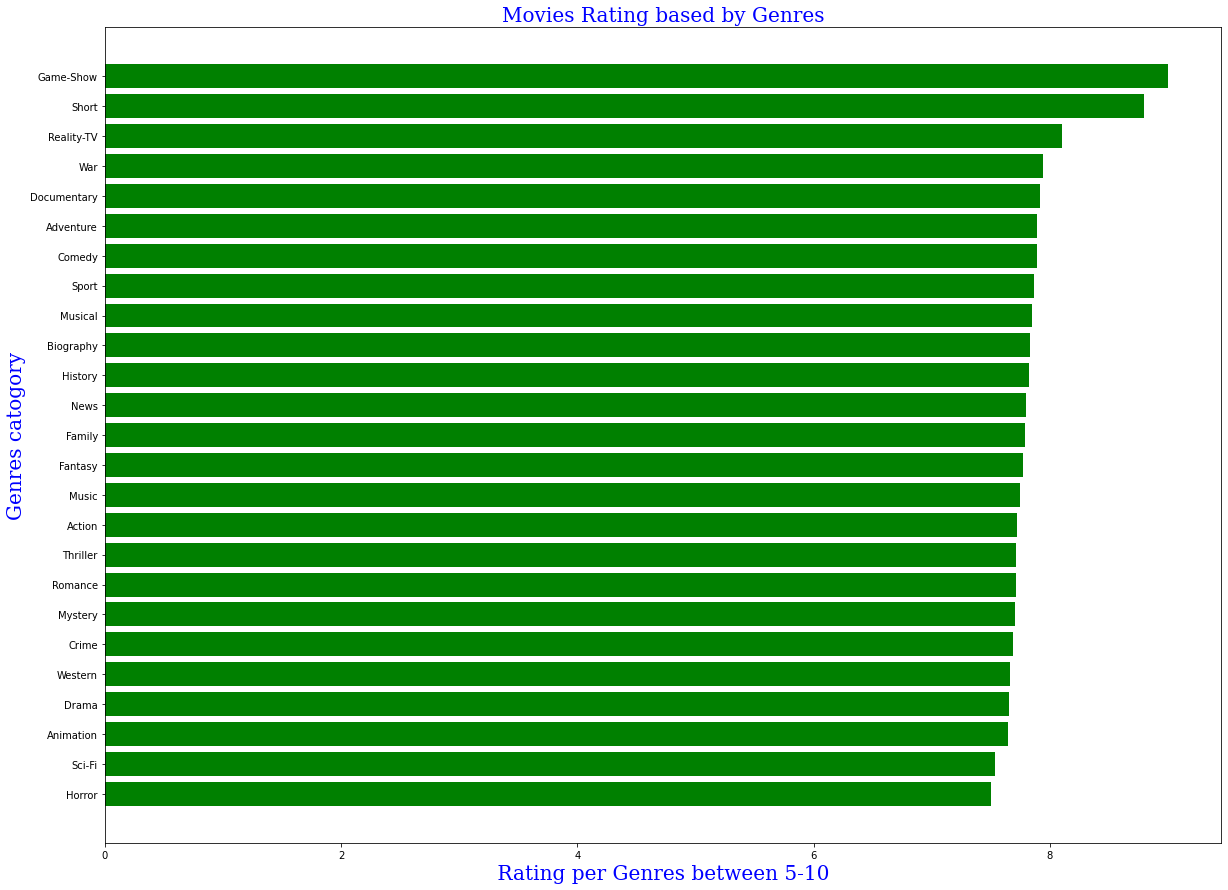

In [20]:
# creating the figure and setting the figure size
fig,ax = plt.subplots(figsize=(20,15))



# Graph y vs width as a horizantal bar graph
y = grouped.sort_values()
ax.barh(y.index,width = y.values , color ="green")

#  Customize title and axes labels    
font1 = {'family':'serif','color':'blue','size':20}
ax.set_title("Movies Rating based by Genres",fontdict = font1)
# Set labels for X and Y axes
ax.set_xlabel(" Rating per Genres between 5-10 ",fontdict = font1)
ax.set_ylabel("Genres catogory",fontdict = font1 )


Based on the information we got from joining the movie_basic table and movie_rating 
the highest number of produced movies was the doocumantary movies,However;
the highest rating we got on the Game_show

# The second  question is: What is the distribution of Total gross baed on Production gross?

Inorder to answer this question we will load the data from csv files as  DataFrames and clean it as a first step,

second step,Then we will joined these to Data Frames.


### Load the Data

Load the Data from ("zippedData/bom.movie_gross.csv.gz") file as a DataFrame in pandas.


In [21]:
# Importing data from csv file 
# Reset the index of the dataframe
# Display the first 5 rows of df by using .head() method

df2 = pd.read_csv("zippedData/bom.movie_gross.csv.gz",index_col=0)
df2.reset_index(inplace=True)
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


We've now loaded the data from a file into a DataFrame with new index 

Get a concise summary of the data using .info()

In [22]:
#getting summary about the dataframe by using .info method
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data types :
The columns containing strings are type object,
The columns containing whole number are type int64 whereas, 
The columns containing decimal numbers are type float64.

### Perform Data Cleaning

From the summary we got above ,We noticed that we need to clean the dataframe by changing some colunms data type,identifying and handeling missing data if there is any ,may be reshape the data frame to make it more understandable.

#### Changing  datatype

The column year has a data type int64 and this column containes dates ,so the data type should changed to date time .
convert the data type from intger to date time by using .to_datetime() method.

In [23]:
# Use pandas.to_datetime() to convert string to datetime format

df2["year"] = pd.to_datetime(df2["year"])
df2["year"]

0      1970-01-01 00:00:00.000002010
1      1970-01-01 00:00:00.000002010
2      1970-01-01 00:00:00.000002010
3      1970-01-01 00:00:00.000002010
4      1970-01-01 00:00:00.000002010
                    ...             
3382   1970-01-01 00:00:00.000002018
3383   1970-01-01 00:00:00.000002018
3384   1970-01-01 00:00:00.000002018
3385   1970-01-01 00:00:00.000002018
3386   1970-01-01 00:00:00.000002018
Name: year, Length: 3387, dtype: datetime64[ns]

### Identifying and Handling Missing Values

Checking if the data frame has missing data by using .isna() method

Fill in missing values (either using another value from the column, like median)

Drop rows with missing values 

In [24]:
#checking for missing values

df2.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Notice , we having a lot of missing values on both (domestic_gross and foreign_gross )columns , so we need to fill all these missing values by median values for both columns.
First let us change the (foreign_gross) data type from object to float using .to_numeric() metjod.

In [25]:
#convert the type of foreign_gross colunm from object to float

df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'],errors = 'coerce')


In [26]:
df2['foreign_gross'].astype(float)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [27]:
# Calculate the median value for foreign_gross column

med =df2["foreign_gross"].median()
med

18900000.0

In [28]:
# Replace all missing values in the (foreign_gross) column with the median of the column#

df2["foreign_gross"] = df2['foreign_gross'].fillna(df2['foreign_gross'].median())

In [29]:
# colunm by the median value for (domestic_gross) column.

med1 = df2["domestic_gross"].median()
med1

1400000.0

I chose median as the relevant measure . when variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [30]:
# Replace all missing values in the 'foreign_gross' column with the median of the column#
df2["domestic_gross"] = df2['domestic_gross'].fillna(df2['domestic_gross'].median())

In [31]:
df2=df2.dropna()

In [32]:
df2.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Now our df2 data frame has no missing values

### Reshape the dataframe

Change the column name from year to release_date

Reset the index and display the top 5 rows after applied the change by using .head()method


In [33]:
# Change the column name by using .rename() method 

df2.rename(columns = {'year':'release_date'}, inplace = True)

In [34]:
# display the index
df2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386],
           dtype='int64', length=3382)

In [35]:
# Reset the index and display the top 5 rows after applied the change by using .head()method

df2=df2.reset_index(drop=True)

df2.head()

,title,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,1970-01-01 00:00:00.000002010
3,Inception,WB,292600000.0,535700000.0,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,1970-01-01 00:00:00.000002010


Getting summary about the dataframe by using .info method

In [36]:
# Getting summary about the dataframe by using .info method
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3382 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3382 non-null   float64       
 3   foreign_gross   3382 non-null   float64       
 4   release_date    3382 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.2+ KB


The data types seem to line up with what we expect. The column containing strings is type object .
The columns containing floats are type float64.
The column containing date is type datetime64

### Load the Data

Load the Data from  ("zippedData/tn.movie_budgets.csv.gz") file as DataFrame in Pandas.

In [37]:
# Importing data from the file (tn.movie_budgets.csv.gz)
# view the first 5 rows by using .head() method.

df3 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz",index_col=0)
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Getting Summary of the dataframe by using .info()method

In [38]:
# Summary of the dataframe by using .info()method

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


The data types seem to line up with what we expect. The columns containing strings are type object

### Perform Data Cleaning

Changing some datatypes

Identifying and Handling Missing Values

Reshape the data frame

#### Changing some datatypes



From the summary we got above ,we notice that the column (releas_date) has a data type object and this column containes dates ,so the data type should changed to date time by using .to_datetime() method.

In [39]:
# Use pandas.to_datetime() to convert string to datetime format
df3["release_date"] = pd.to_datetime(df3["release_date"])
df3["release_date"]

id
1    2009-12-18
2    2011-05-20
3    2019-06-07
4    2015-05-01
5    2017-12-15
        ...    
78   2018-12-31
79   1999-04-02
80   2005-07-13
81   2015-09-29
82   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

We also can notico from the summary above that the (production_budget,domestic_gross,worldwide_gross) columns appear with object data type,it also containes $ sign and comma . So we need to clean the data in them.
We will create a function to clean unwanted signes and convert the data type to float.
Then apply this function to the columns using .apply () method

In [40]:
# Use function to convert object to float format
def convert_protection(value):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = value.replace(',','').replace('$', '')
    return float(new_val)

In [41]:
# Apply the function to the (production_budget) series

df3["production_budget"] = df3["production_budget"].apply(convert_protection)


In [42]:
# Apply the function to the (domestic_gross) series

df3["domestic_gross"] = df3["domestic_gross"].apply(convert_protection)

In [43]:
# Apply the function to the (worldwide_gross) series

df3["worldwide_gross"] = df3["worldwide_gross"].apply(convert_protection)

The .apply () method takes a function as an input and applies this function to an entire DataFrame.

#### Get a concise summary of the data using .info()

In [44]:
# Summary after applied changes to the data frame

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


The data types seem to line up with what we expect. The column containing strings is type object . The columns containing floats are type float64. The column containing date is type datetime64

#### Identifying and handling   Missing Values 

In [45]:
#check for missing data
df3.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We can noticethat df3 is clean now ,there is no missing values

#### Reshape the data frame

Let us make our data frame more understandable , we will change some colunms names using .rename() method

In [46]:
#change the column name
df3.rename(columns = {'worldwide_gross':'foreign_gross'}, inplace = True)

In [47]:
#change thw column name
df3.rename(columns = {'movie':'title'}, inplace = True)

In [48]:
#display the top 5 rows after changing by using .head() methods
df3.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Now our df2 and df3 are both clean and ready to join to gether inorder to answer our question.

# Joining the Dataframes Together

First, identify the shared key between df2  and df3. (Shared key meaning, the values you want to join on.)
the shared key between the second and third dataframes is (domestic_gross)column.
We will join theseDataFrames to gether based on (domestic_gross) colounm using .merge() method.

In [49]:
# Create a new dataframe by  combinngdf3and df2 by using .merge() method 
# view thetop 5 rows of dataframe by using .head() method
budget_df=pd.merge(df3,df2,how="left")
budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross,studio
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN


The budget_df has all reports from df3 and the shared colunm (domestic_gross) based on the left merge.

### Get a concise summary of the data using .info()

In [50]:
# summary of the joined dataframe 

budget_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   foreign_gross      5782 non-null   float64       
 5   studio             0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 316.2+ KB


The data types seem to line up with what we expect. The column containing strings is type object . The columns containing floats are type float64. The column containing date is type datetime64

### Perform Data Cleaning Required to Answer Second Question

Recall that the second  question is: What is the distribution of total gross based on production budget?

To answer this question, we will need to:

### Identifying and Handling Missing Values

Use .isna() method to check for missing values in budget_df.
Use .drop() to remove the missing values

In [51]:
#checking for missing values

budget_df.isna().sum()

release_date            0
title                   0
production_budget       0
domestic_gross          0
foreign_gross           0
studio               5782
dtype: int64

We can noticetha studio colunm has a huge number of missing data ,we can remove them by using .drop()method

In [52]:
#drop studio column

budget_df = budget_df.drop("studio",axis = 1)

In [53]:
# Display the 5 top rows from the joined dataframe after cleaning it

budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Analizing Data

When we review the budget_df ,we can notice that we need to calculate the total gross of each movie inorder to compare it with the production
budget and determine wheather the  movie make profts?

Let us Creating a new colunm called (total_gross) containing the sumation of (domestic_gross) and (foreign_gross) columns


In [54]:
# Creating a new colunm called (total_gross) containing the sumation of (domestic_gross) and (foreign_gross) columns
# Display thetop 5 rows of the DataFrame

budget_df["total_gross"]=sum(budget_df["domestic_gross"],budget_df["foreign_gross"])
budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross,total_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.448879e+11
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.431572e+11
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2.422613e+11
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2.435146e+11
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2.434283e+11


### Analize the relationship between the production_budget and total_gross

We assume that we can gain more from a movie has a big production budget.
Let us measures of central tendency and dispersion

In [55]:
# display the dataframe sorted by the production budget from high to low cost

budget_df.sort_values(by = "production_budget",ascending = [False]).head()

,release_date,title,production_budget,domestic_gross,foreign_gross,total_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.448879e+11
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.431572e+11
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2.422613e+11
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2.435146e+11
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2.434283e+11


Notice that the budget_df ordred by the production_budget values from highest to lowest.

#### calculate some basic statistical of the data frame 
 

Let us use .describe() method to calculate some basic statistical of the data frame or a series of numeric values.


In [56]:
# display the dataframe based on 
budget_df.describe()

,production_budget,domestic_gross,foreign_gross,total_gross
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,2.422031e+11
std,4.181208e+07,6.824060e+07,1.747200e+08,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,2.421116e+11
25%,5.000000e+06,1.429534e+06,4.125415e+06,2.421157e+11
50%,1.700000e+07,1.722594e+07,2.798445e+07,2.421396e+11
75%,4.000000e+07,5.234866e+07,9.764584e+07,2.422092e+11
max,4.250000e+08,9.366622e+08,2.776345e+09,2.448879e+11


Let us explane the most important measure in this case:

Std :Standard deviation refers to  how widely distributed the values are

we can notice that the movie with highest production budget can get highest total gross

# Data_visualization

Let's also plot out our data to claryfy the relationship between production_budget and total_gross
We will use Scatter plot.

A scatter plot uses dots to represent values for two different numeric variables.one plotted along the x-axis and the other plotted along the y-axis. 
Scatter plots are used to observe relationships between variables.


### Scatter Plots in Matplotlib

The following code shows the simplest possible scatter plot with our x and y variables, using the scatter method 
(https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

''

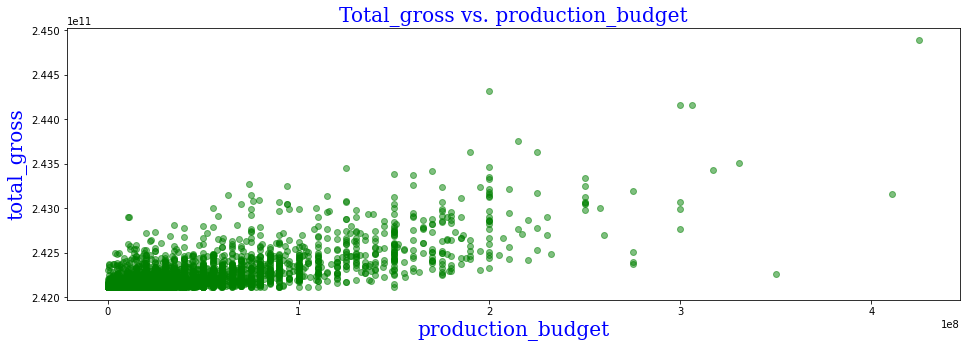

In [57]:
# Create the plot with figure size

fig, ax = plt.subplots(figsize=(16, 5))

# Graph X vs. Y as a scatter plot

ax.scatter(
    x = budget_df["production_budget"],
    y = budget_df["total_gross"],
    alpha=0.5 ,color ="green"
)
# Set title
font1 = {'family':'serif','color':'blue','size':20}
ax.set_xlabel("production_budget",fontdict = font1)

# Set labels for X and Y axes
ax.set_ylabel("total_gross",fontdict = font1)
ax.set_title("Total_gross vs. production_budget",fontdict = font1)

;

Notice that , in general, as production_budget increases, total_gross increases as well which means the data points have a positive  corelationship.


# The third question is: What is the distribution of Box_office  baed on release time depends on the movie released  month?

Inorder to answer this question we will load the data from csv files as a DataFrame and clean it as a first step,

second step we will joined these to Data Frames.

### Load the Data

 load the data from (tmdb.movies.csv.gz) csv file as a DataFrame and clean it as a first step,

In [58]:
# loading data from (tmdb.movies.csv.gz) file
# Using spesific columns from the dataframe4 
# View the top 5 rows of the DataFrame

df4=pd.read_csv("zippedData/tmdb.movies.csv.gz",usecols=["title","release_date","vote_average","vote_count","popularity"])
df4.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


#### calculate some basic statistical of the data frame

In [59]:
#summary about df4 by using .info()methods

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    26517 non-null  float64
 1   release_date  26517 non-null  object 
 2   title         26517 non-null  object 
 3   vote_average  26517 non-null  float64
 4   vote_count    26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


The data types line up :
The column containing strings is type object . 
The columns containing floats are type float64. 
The column containing intger is type int64

#### Perform Data Cleaning

Let us clean the df4 based on what we found on the above summary ,It would be good to change some data types,Identifying and Handling Missing Values ,Reshape the data frame

#### Change some data types

We notice that the (release_date) column should represent date but it appears as object however;It should be in a datetime format.
use .to_datetime()

In [60]:
# Use pandas.to_datetime() to convert Object to datetime format
df4["release_date"] = pd.to_datetime(df4["release_date"])
df4["release_date"]

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

 The (release_date) column data type appears as datetime

The data types seem to line up with what we expect. The column containing strings is type object
The columns containing floats are type float64  ,The column containing intger is type int64 
he column containing date is type datetime64


### Cleaning the dataframe

Identifying and Handling Missing Values by using .isna()

In [61]:
#checking for missing values
df4.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

There is no missing value

### Load the Data

load the data from (movie_info.tsv.gz) csv file as a DataFrame and clean it as a first step

In [62]:
# Import data from  (movie_info.tsv.gz) file
#sep ="\t" to read tsv files as cvs
# view the top 5 rows from the data frame use .head()

df5 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t")
df5.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### Get a concise summary of the data using .info()

In [63]:
#summary of dataframe5 by using .info()method

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The data types seem to line up with : The columns containing strings are type object

### Cleaning the dataframe

#### Reshape the data frame
Let us make our data frame more understandable , we use spesific columns

In [64]:
# using spesifics colunms from df5
# view the top 5 rows from the data frame use .head()
df5 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t",usecols=["genre","director","writer","theater_date","box_office"])
df5.head()

,genre,director,writer,theater_date,box_office
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000"
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",NaN
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",NaN
4,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN


#### Get a concise summary of the data using .info()

In [65]:
#summary of dataframe5 by using .info()method

df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genre         1552 non-null   object
 1   director      1361 non-null   object
 2   writer        1111 non-null   object
 3   theater_date  1201 non-null   object
 4   box_office    340 non-null    object
dtypes: object(5)
memory usage: 61.1+ KB


The data types seem to line up with :
The columns containing strings are type object

#### Changing some datatypes
From the summary we got above ,we notice that the column (theater_date) has a data type as object and this column containes dates ,so the data type should changed to datetime by using .to_datetime() method.

In [66]:
# Use pandas.to_datetime() to convert string to datetime format
df5["theater_date"] = pd.to_datetime(df5["theater_date"])
df5["theater_date"]

0      1971-10-09
1      2012-08-17
2      1996-09-13
3      1994-12-09
4             NaT
          ...    
1555   2006-08-18
1556   1993-07-23
1557   1962-01-01
1558   1993-04-01
1559   2001-09-27
Name: theater_date, Length: 1560, dtype: datetime64[ns]

From the summary we got above ,we notice that the column (box_office) has a data type object and this column containes numerical values ,so the data type should changed to float by using a function
and apply it to the data frame.


In [67]:
# Use function to convert object to float format
def convert_box_office(value):
    """
    Convert the string number value to a float
     
     - Remove commas
     - Convert to float type
    """
    new_val = value.replace(',','')
    return float(new_val)

In [68]:
# Apply the function to the (production_budget) series

df5["box_office"] = df5["box_office"].astype(str)

In [69]:
# Apply the function to the (production_budget) series

df5["box_office"] = df5["box_office"].apply(convert_box_office)

#### Get a concise summary of the data using .info()

In [70]:
# Sumarry of df5 by using .info() method
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genre         1552 non-null   object        
 1   director      1361 non-null   object        
 2   writer        1111 non-null   object        
 3   theater_date  1201 non-null   datetime64[ns]
 4   box_office    340 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 61.1+ KB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64

### cleaning the dataframe

#### Identifying and Handling Missing Values

Use .isna() to identyfy if there are missing values in the data frame

In [71]:
#checking for missing values
df5.isna().sum()


genre              8
director         199
writer           449
theater_date     359
box_office      1220
dtype: int64

We got alot of missing values,we have to handle it either by removing non important columns for our analizing by.dropna() or fill the missing values by median value of the same column which have missing numerical values

In [72]:
# calculate the median value for the box_office colunm

med = df5["box_office"].median()
med

14141054.5

In [73]:
#using the missing values with median by using .fillna() method

df5["box_office"] = df5["box_office"].fillna(med)

In [74]:
# remove the rows which have missing values

df5 = df5.dropna()


In [75]:
# make sure there is no missing value

df5.isna().sum()

genre           0
director        0
writer          0
theater_date    0
box_office      0
dtype: int64

#### Changing the column name 

Let us make our data frame looks more understandable 

In [76]:
# changing the column name by using .rename()

df5.rename(columns = {'theater_date':'release_date'}, inplace = True)

Let us see our data frame after update ,use .head() method

In [77]:
# display the top 5 rows of the dataframe by using .head() method

df5.head()

,genre,director,writer,release_date,box_office
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,14141054.5
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,600000.0
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,14141054.5
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,14141054.5
5,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,14141054.5


#### Get a concise summary of the data using .info()

In [78]:
# summary of dataframe5 by using .info()method

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 1558
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genre         891 non-null    object        
 1   director      891 non-null    object        
 2   writer        891 non-null    object        
 3   release_date  891 non-null    datetime64[ns]
 4   box_office    891 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.8+ KB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64

In [79]:
# display the top 5 rows of the dataframe by using .head() method

df5.head()

,genre,director,writer,release_date,box_office
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,14141054.5
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,600000.0
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,14141054.5
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,14141054.5
5,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,14141054.5


### Joining the Dataframes Together

Joining the Dataframes Together First, identify the shared key between df4 and df5. (Shared key meaning, the values we want to join on).
The shared key between these two dataframes is (release_date) column.
We will use .merge() method

In [80]:
# Create new data frame by combining df4 and df5
# View the top 5 rows from the data frame.

box_office_df = pd.merge(df4,df5,on ="release_date")
box_office_df.head()

,popularity,release_date,title,vote_average,vote_count,genre,director,writer,box_office
0,28.005,1995-11-22,Toy Story,7.9,10174,Action and Adventure|Comedy|Drama|Mystery and ...,Joseph Ruben,David Loughery|Doug Richardson,14141054.5
1,28.005,1995-11-22,Toy Story,7.9,10174,Action and Adventure|Comedy|Drama|Mystery and ...,Joseph Ruben,David Loughery|Doug Richardson,14141054.5
2,22.698,1999-11-24,Toy Story 2,7.5,7553,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,14141054.5
3,22.698,1999-11-24,Toy Story 2,7.5,7553,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,14141054.5
4,18.199,2004-07-23,The Bourne Supremacy,7.3,4367,Action and Adventure|Drama|Mystery and Suspense,Paul Greengrass,Tony Gilroy,176049130.0


The merge between the df4 and df5 is Left Join (by default) returns all the records from the left table, as well as the shared records from the right table .

### Perform Data Cleaning Required to Answer the third question
Recall that the the third  question is: What is the relationship between the movie released month and box office profets.

To answer this question, we will need to:

### Identifying and Handling Missing Values

In [81]:
# checking if there is any missing value in the dataframe

box_office_df.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
genre           0
director        0
writer          0
box_office      0
dtype: int64

There is no any missing value in  the dataframe

### Analizing Data

Inorder to answer the question we need to deal with (release_date) column and extract month from it.
use .to_datetim () method

In [82]:
# Display the "release_date" column

box_office_df["release_date"]

0      1995-11-22
1      1995-11-22
2      1999-11-24
3      1999-11-24
4      2004-07-23
          ...    
2954   2018-05-18
2955   2018-05-18
2956   2018-05-18
2957   1957-12-26
2958   1968-12-23
Name: release_date, Length: 2959, dtype: datetime64[ns]

In [83]:
# Extract Month from "release_date" column
# convert the month formate from number to name 

box_office_df['month'] = pd.to_datetime(box_office_df['release_date']).dt.month_name()

box_office_df.head()

,popularity,release_date,title,vote_average,vote_count,genre,director,writer,box_office,month
0,28.005,1995-11-22,Toy Story,7.9,10174,Action and Adventure|Comedy|Drama|Mystery and ...,Joseph Ruben,David Loughery|Doug Richardson,14141054.5,November
1,28.005,1995-11-22,Toy Story,7.9,10174,Action and Adventure|Comedy|Drama|Mystery and ...,Joseph Ruben,David Loughery|Doug Richardson,14141054.5,November
2,22.698,1999-11-24,Toy Story 2,7.5,7553,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,14141054.5,November
3,22.698,1999-11-24,Toy Story 2,7.5,7553,Animation|Comedy|Kids and Family|Science Ficti...,John Lasseter,Doug Chamberlain|Rita Hsiao|Doug Chamberlin|Ch...,14141054.5,November
4,18.199,2004-07-23,The Bourne Supremacy,7.3,4367,Action and Adventure|Drama|Mystery and Suspense,Paul Greengrass,Tony Gilroy,176049130.0,July


We notice, that we got the months names by using .to_datetime().dt.month_name()

#### Get a concise summary of the data using .info()¶

In [84]:
# Summery of the dataframe
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    2959 non-null   float64       
 1   release_date  2959 non-null   datetime64[ns]
 2   title         2959 non-null   object        
 3   vote_average  2959 non-null   float64       
 4   vote_count    2959 non-null   int64         
 5   genre         2959 non-null   object        
 6   director      2959 non-null   object        
 7   writer        2959 non-null   object        
 8   box_office    2959 non-null   float64       
 9   month         2959 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 254.3+ KB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64
the column containing intger are type  int64 .


### Analize the relationship between the box_office profets per each month

Inorder to answer our question we have to group the data frame by ("month") column by using .groupby() method.We have to add an Aggregation Function  (like mean) onto the groupby. This allows us to compute summary statistics!
We would use .sort_values to view the data frame orginized base on box_office profets.

In [85]:
# create a new data frame grouped by months names and calculate the mean values 
# display the new dataframe 

month_df = box_office_df.groupby("month")["box_office"].mean()
month_df.sort_values()


month
September    8.530560e+06
July         1.065038e+07
February     1.274876e+07
October      1.299413e+07
January      1.716272e+07
August       2.319793e+07
June         2.389823e+07
March        2.436513e+07
November     2.562330e+07
May          3.128085e+07
April        3.367506e+07
December     3.862327e+07
Name: box_office, dtype: float64

We got the box_office profets per evey month.The highest box_office profets recorded on December during holidies season ( christmas holiday/December)

Based on the above data frame the maximum movies earnings are on holidies season ( christmas holiday/December)

# Data_visualization

Let's also plot out our data to claryfy the relationship between the box_office profets per every month using bar graph  plot.

Text(0, 0.5, 'Months')

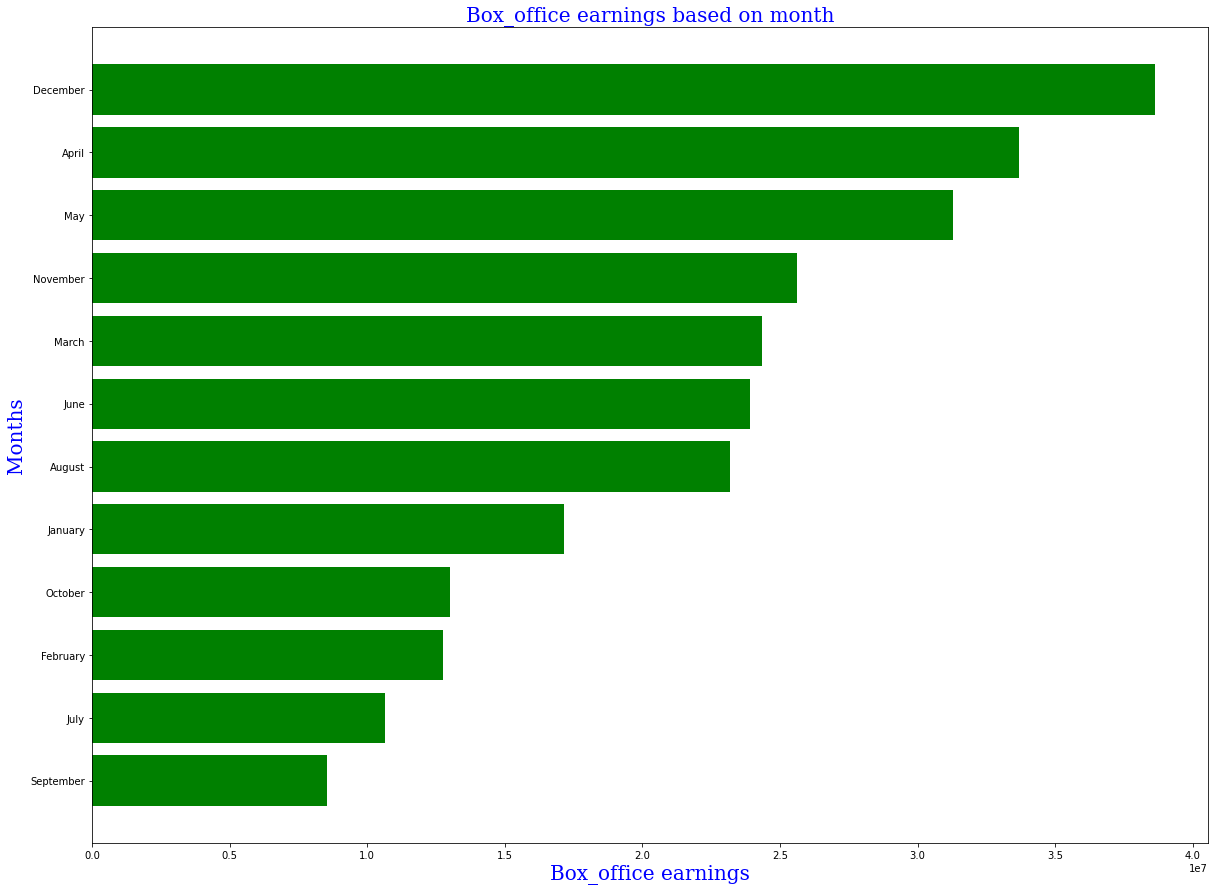

In [86]:
# creating the figure and setting the figure size

fig,ax = plt.subplots(figsize=(20,15))

# Graph y vs width as a horizantal bar graph
y = month_df.sort_values()
ax.barh(y.index,width = y.values , color = "green")

#  Customize title and axes labels
font1 = {'family':'serif','color':'blue','size':20}
ax.set_title("Box_office earnings based on month",fontdict = font1)
ax.set_xlabel("Box_office earnings",fontdict = font1 )
ax.set_ylabel("Months",fontdict = font1 )

Notice that , in general,the highest value of box_office earnings had achived on DECEMBER during the holidaies seasons

# Results

We found som aspects can affect the movie's profets 

First: Genre

AS we can notify from the figure below ,There is a clear relatioship between the movie's genre and the movie rating.
As known the highest rating means higest profets,as well.

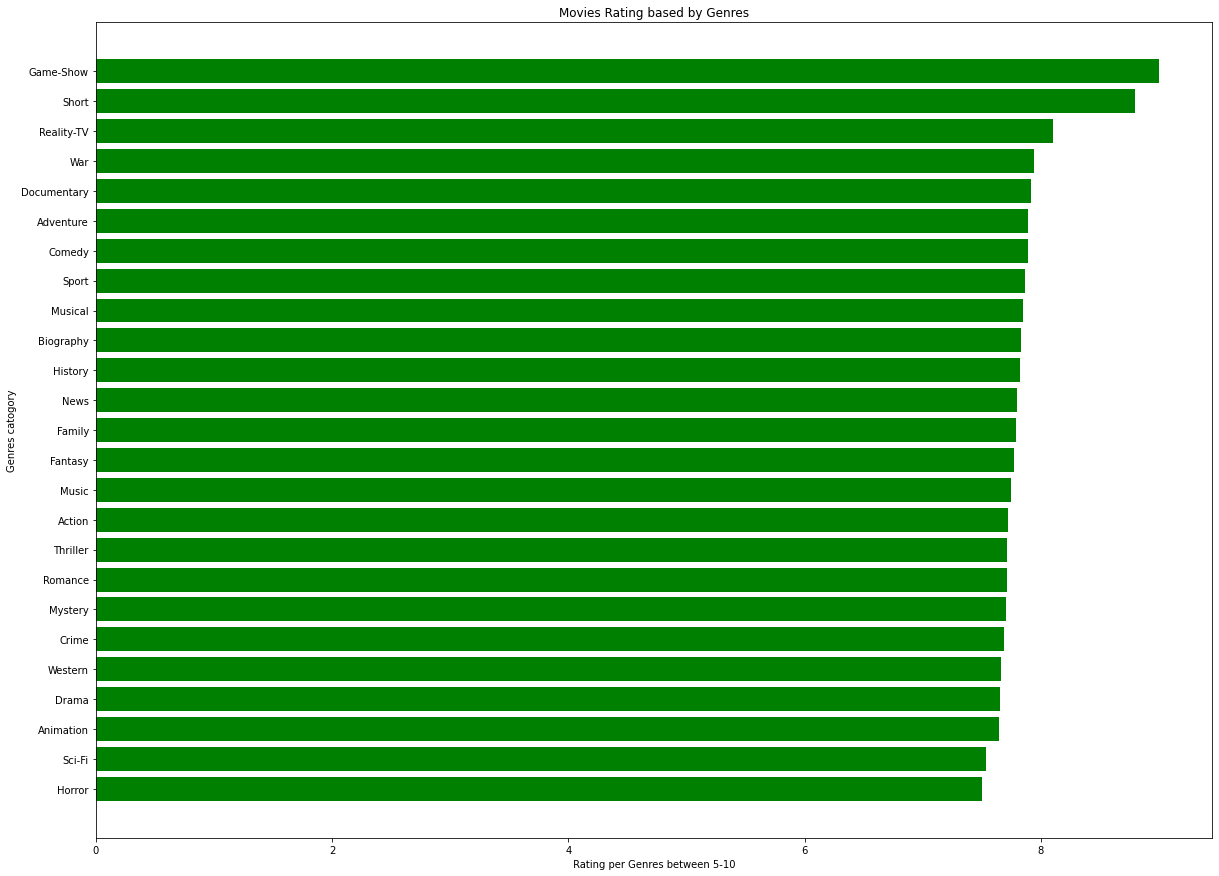

The game show genre got the highet rating .That means this type of movie can achive much money!

Second : Production budget

When we take a look at the figure below ,We can  notify  the postive corelation between the movie's production budget avarage  and the movie's total gross  which represents both forgien gross and domestic gross
When we pay more on production budget we can gain more from movie's gross either locally or overseas

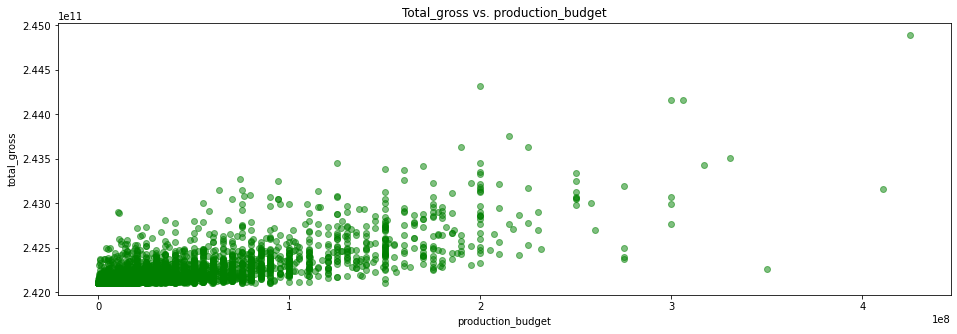

Third : Released date

When we take a look at the figure below ,We can notify the clear relationship between the boxoffis profets baed on the month that the movie released on .
The highest profets reported on December. That means the movie can gain more profets if it diplayed on theater during the christmas season.

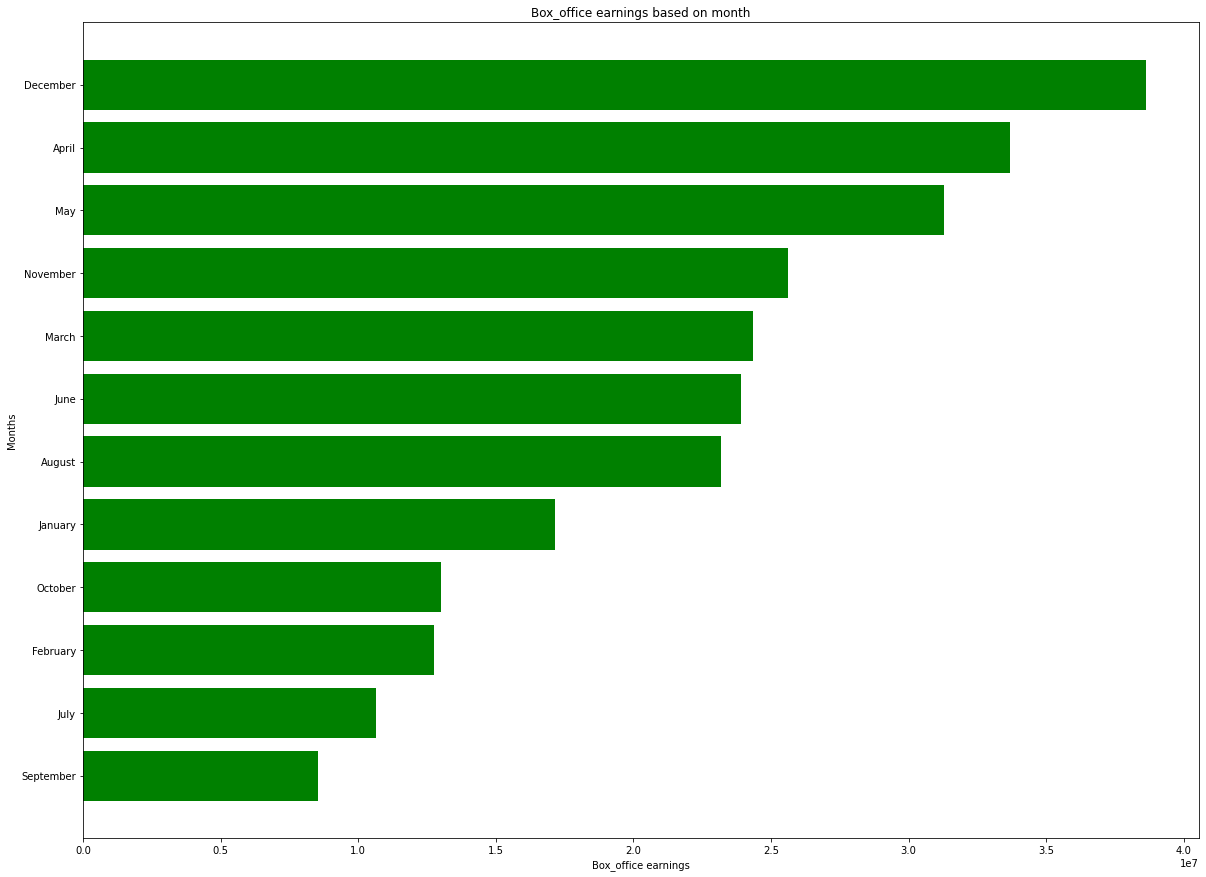

### Conclusion
This analysis leads to three recommendations for helping Microsoft company to understand the process of producing movies and the factors are affected thier profets.

1. Better prediction of the movie's genres that are likely to have gain more profets.This modeling could use already available data, such as the avarage of rate per each movie's genre.

2. The budget needed to produce a sucssussful movie. This modeling could predict the avarage amount of money need for producing a movie can achieve more profets.

3. Better prediction of the movie's release time at the theaters.This modeling could use already available data, such as the avarage of box office profets depends on release month.